$$
Areaₚ = π * (Rₚ)²
$$
$$
Transit Depth = (Rₚ/Rs)^2 
$$

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import lightkurve as lk

In [4]:
TIC = 'TIC 55525572'

available_data_select = lk.search_lightcurve(TIC, author = 'SPOC')[0:9]
lc_collection = available_data_select.download_all().stitch()

# Params from exofop
period = 83.8979
t0 = 2125.847

In [5]:
lc_phased = lc_collection.fold(period = period, t0 = t0)
lc_phased_binned = lc_phased.bin(15/24/60)

/Users/buyer/Documents/Lens/client/api/.venv/lib/python3.10/site-packages/astropy/utils/decorators.py:607: LightkurveDeprecationWarning: "t0" was deprecated in version 2.0 and will be removed in a future version. Use argument "epoch_time" instead.
  return function(*args, **kwargs)


(0.996, 1.004)

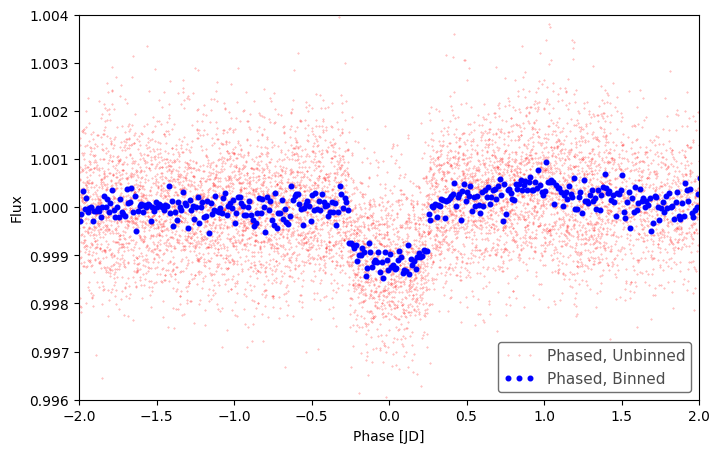

In [11]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (8, 5))
lc_phased.plot(ax = ax, linewidth = 0, marker = '.', color = 'red', markersize = 0.71, alpha = 0.4, label = 'Phased, Unbinned')
lc_phased_binned.plot(ax = ax, linewidth = 0, marker = 'o', color = 'blue', markersize = 3.3, alpha = 1, label = 'Phased, Binned')

plt.xlim(-2, 2)
plt.ylim(0.996, 1.004)

We're starting from where we were in the `PhaseFolding.ipynb` notebook, because to calculate the radius of a potential planet we need to know its transit depth (on binned + phase folded, normalised)

In Deepnote, we can draw across the graph to look at the transit depth. This value would be 1 (normalised flux) minus the value at the vertical middle of the phased AND binned curve (for example, for this TIC ID and these sectors, it's 0.9988). So, the transit depth is:

$$
1 - flux(dip)
$$

Or in simpler terms:

$$
1 - ~0.9988
$$

(0.996, 1.004)

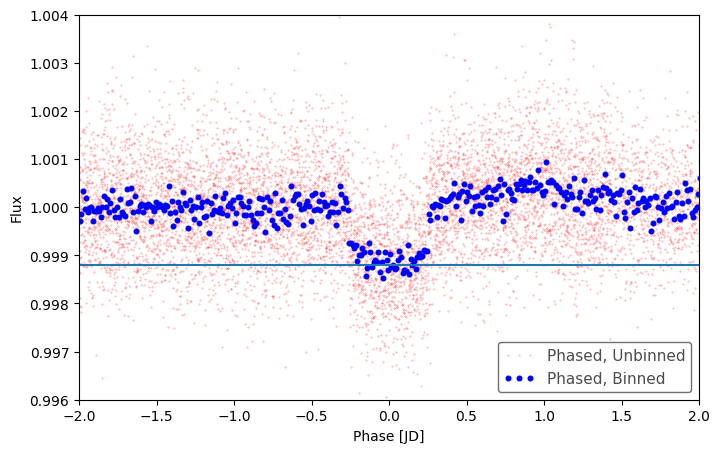

In [12]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (8, 5))
lc_phased.plot(ax = ax, linewidth = 0, marker = '.', color = 'red', markersize = 0.71, alpha = 0.4, label = 'Phased, Unbinned')
lc_phased_binned.plot(ax = ax, linewidth = 0, marker = 'o', color = 'blue', markersize = 3.3, alpha = 1, label = 'Phased, Binned')

plt.axhline(0.9988)
plt.xlim(-2, 2)
plt.ylim(0.996, 1.004)

In [13]:
from astropy import units as u
import numpy as np

In [14]:
transit_depth = 1 - 0.9988
R_star = 2.04354 * u.Rsun # Retrieve from exofop -> can we automate this?
R_pl_sr = np.sqrt(transit_depth) * R_star # Radius of planet in solar radii

Let's convert this value into something we can visualise -> in radius of our planet (Earth!) :)

In [16]:
r_pl_earth = R_pl_sr.to(u.Rearth)
r_pl_earth

<Quantity 7.72154924 earthRad>

Note that if you come across a target that is ~20 times the radius of Earth, it's probably too big to be a planet :/ 